# PCA Model

In [47]:
# import packages
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble  import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [48]:
# Import dataframe

df0 = pd.read_csv('../../Data/sample_data_pca.csv')
df0.head()

,user_id,purchased_album,artist1,artist2,artist3,artist4,artist5,artist6,artist7,artist8,artist9,artist10,artist11,artist12,artist13,artist14,artist15,artist16,artist17,artist18,artist19,artist20,artist21,artist22,artist23,artist24,artist25,artist26,artist27,artist28,artist29,artist30,artist31,artist32,artist33,artist34,artist35,artist36,artist37,artist38,...,artist61,artist62,artist63,artist64,artist65,artist66,artist67,artist68,artist69,artist70,artist71,artist72,artist73,artist74,artist75,artist76,artist77,artist78,artist79,artist80,artist81,artist82,artist83,artist84,artist85,artist86,artist87,artist88,artist89,artist90,artist91,artist92,artist93,artist94,artist95,artist96,artist97,artist98,artist99,artist100
0,1,1,0.0000,0.0891,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.0522,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0000,0.14,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0000,...,0.0,0.0,0.0,0.0000,0.0,0.0000,0.1046,0.0007,0.0000,0.0003,0.0004,0.0001,0.0000,0.0,0.0,0.0000,0.0000,0.0000,0.0010,0.1710,0.0024,0.0000,0.016,0.0022,0.0000,0.0000,0.0031,0.0000,0.0000,0.0000,0.0000,0.0001,0.0606,0.0,0.0000,0.0578,0.1554,0.0001,0.0000,0.0000
1,2,0,0.0000,0.0000,0.0,0.0,0.0,0.0001,0.0,0.0,0.0,0.0,0.0,0.0001,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0004,0.0,0.0,0.0,0.0,0.0,0.0009,0.0,0.0000,0.00,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0022,...,0.0,0.0,0.0,0.0023,0.0,0.0000,0.0093,0.0001,0.0000,0.0000,0.0205,0.0000,0.0531,0.0,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0013,0.0000,0.000,0.0016,0.0001,0.0127,0.0000,0.0003,0.0000,0.0123,0.0008,0.0000,0.0016,0.0,0.0000,0.0000,0.0030,0.0034,0.8695,0.0037
2,3,1,0.0002,0.0000,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0002,0.0001,0.0002,0.0000,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0002,0.00,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0000,...,0.0,0.0,0.0,0.0000,0.0,0.0000,0.0000,0.0000,0.0001,0.0000,0.0000,0.0035,0.0000,0.0,0.0,0.0006,0.0014,0.0000,0.0000,0.0000,0.0003,0.0000,0.000,0.0000,0.2290,0.0000,0.0000,0.0000,0.0452,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.7179,0.0000,0.0008
3,4,1,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0009,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0000,0.00,0.0,0.0,0.0,0.0005,0.0,0.0,0.0,0.0,0.0,0.0000,...,0.0,0.0,0.0,0.0000,0.0,0.0000,0.0001,0.0000,0.0000,0.0000,0.1072,0.0001,0.0000,0.0,0.0,0.0000,0.1347,0.0000,0.0000,0.0025,0.0000,0.0000,0.000,0.1298,0.3995,0.0000,0.0003,0.0000,0.0000,0.0000,0.0146,0.0275,0.0060,0.0,0.1724,0.0000,0.0021,0.0012,0.0000,0.0000
4,5,1,0.0006,0.0000,0.0,0.0,0.0,0.0002,0.0,0.0,0.0,0.0,0.0,0.0002,0.0000,0.0004,0.0000,0.0,0.0,0.0,0.0002,0.0,0.0,0.0,0.0,0.0,0.0006,0.0,0.0004,0.00,0.0,0.0,0.0,0.0009,0.0,0.0,0.0,0.0,0.0,0.0040,...,0.0,0.0,0.0,0.0008,0.0,0.0028,0.0000,0.0000,0.0000,0.0000,0.0197,0.0038,0.0000,0.0,0.0,0.0000,0.0245,0.0001,0.0173,0.0000,0.0000,0.0004,0.000,0.1044,0.0001,0.0000,0.0000,0.0000,0.0000,0.0010,0.0310,0.1061,0.0000,0.0,0.0010,0.0000,0.6773,0.0000,0.0000,0.0000


In [49]:
# Remove non desired data from model (Non predictor data or ethics concern)
df1 = df0.drop(['user_id'], axis=1)

In [50]:
# Shuffle data
df2 = shuffle(df1, random_state=42)

In [51]:
# Class balance 
df2['purchased_album'].value_counts(normalize=True)

purchased_album
1    0.533708
0    0.466292
Name: proportion, dtype: float64

In [52]:
# Deal with missing values
df2.isna().sum().sum()

np.int64(0)

In [53]:
# Split into input 'X' and output 'y'
X = df2.drop(['purchased_album'], axis = 1)
y = df2['purchased_album']

In [54]:
# Split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify = y
                                                    )

In [55]:
# Feature scaling
scale_standard = StandardScaler()

X_train = scale_standard.fit_transform(X_train)
X_test = scale_standard.transform(X_test)

In [56]:
# Apply PCA
pca = PCA(n_components=None,
          random_state=42
          )

In [57]:
# Fit Model
pca.fit(X_train)

PCA(random_state=42)

In [58]:
# Calculate Variance Rations for 100 Features
explained_variance = pca.explained_variance_ratio_
explained_variance_cummulative = pca.explained_variance_ratio_.cumsum()

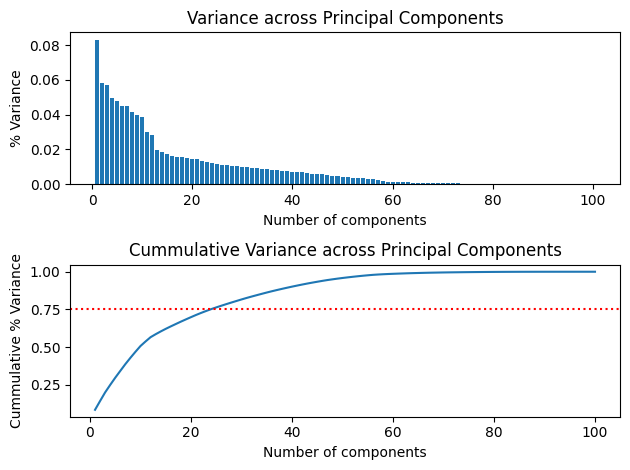

In [59]:
# Visualise variance ratios
num_vars_list = list(range(1,101))

plt.subplot(2,1,1)
plt.bar(num_vars_list,explained_variance)
plt.title('Variance across Principal Components')
plt.xlabel('Number of components')
plt.ylabel('% Variance')
plt.tight_layout()

plt.subplot(2,1,2)
plt.plot(num_vars_list,explained_variance_cummulative)
plt.title('Cummulative Variance across Principal Components')
plt.xlabel('Number of components')
plt.ylabel('Cummulative % Variance')
plt.tight_layout()

plt.axhline(0.75, color = 'red', linestyle=':')

plt.show()

In [60]:
# Reinstantiate model
pca = PCA(n_components=0.75, # Percent of variance to be explained
          random_state=42
          )

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [61]:
# Check the number of feature selected
pca.n_components_

np.int64(24)

In [62]:
# Fit a random forest on the selected components 
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [63]:
# Check for model accuracy
y_pred_class = clf.predict(X_test)
accuracy_score = accuracy_score(y_test, y_pred_class)
accuracy_score

0.9166666666666666